Hello attendees. This notebook is the regression notebook. We will be using a database for house price prediction. This notebook is completely filled for you to look and learn from it. Please try to run and modify these values to experiment and learn from this dataset  
Let us begin by importing some required modules.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let us now upload the required files. Upload the kc_house_data.csv that was provided along with the notebooks. Then we will convert them to dataframes.

In [2]:
import io 
  
house_data = pd.read_csv('kc_house_data.csv') 
print(house_data)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

Now that we have uploaded the csv and obtained our data in a dataframe, we can begin to get a feel for our dataset by first visually checking a sample using the head function.

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let us now look at the statistical details of the dataset using the describe function.


In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Let us check the type of each column and values in each column.

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Now that we know there are 21613 values in our dataset with 21 columns, with 15 integer type, 5 float type and 1 object type, we can start with some simple preprocessing steps. Let us look for any missing data. This can be checked by looking for null values in the dataset.

In [6]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We see no null values so we can proceed with our other segments easily! Let us visualize the target variable, price.

Text(0.5, 1.0, 'Distribution of target variable-Price')

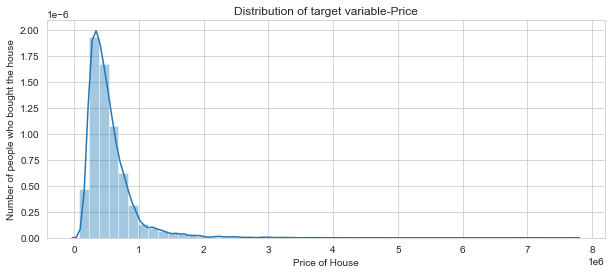

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,4))
sns.distplot(house_data["price"], bins = 50)
plt.xlabel("Price of House")
plt.ylabel("Number of people who bought the house")
plt.title("Distribution of target variable-Price")

let us the distribution of the number of bedrooms with counts.

Text(0.5, 1.0, 'Number of Bedrooms')

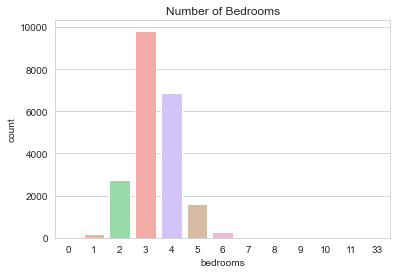

In [8]:
sns.set_style('whitegrid')
sns.countplot(house_data['bedrooms'], palette = "pastel").set_title("Number of Bedrooms")

now we shall check distribution of all numerical distributions

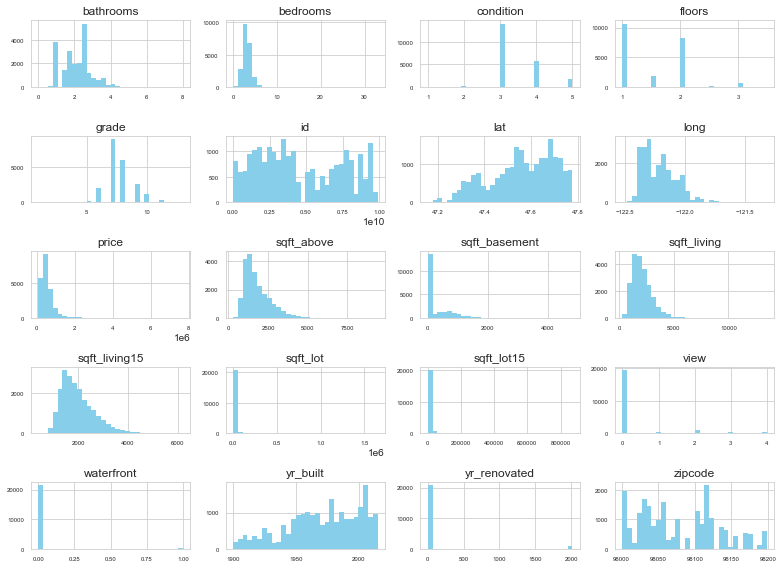

In [9]:
house_data.hist(bins=30, figsize=(11,8), xlabelsize=6, ylabelsize=6, color = "skyblue", lw=0)
plt.tight_layout()
plt.show()

Now we can check the distribution of all houses according to latitude and longitude to see if there is any correlation with location.

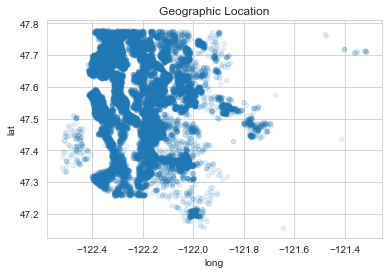

In [10]:
house_data.plot(kind="scatter", x="long", y="lat", alpha=0.1, title = "Geographic Location")

Similarly, lets check all our comparisons between features in pairs and visualize them to see if there is any corelation.  
**Question: How many variables do you see have a plausible corelation with our target variable price?**

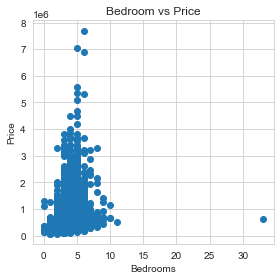

In [11]:
plt.figure(figsize=(4,4))
plt.scatter(x="bedrooms",y="price",data = house_data)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedroom vs Price")
plt.tight_layout()
plt.show()

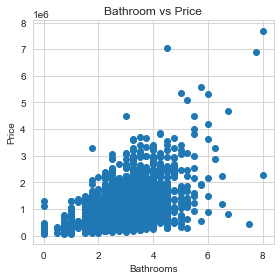

In [12]:
plt.figure(figsize=(4,4))
plt.scatter(x="bathrooms",y="price",data = house_data)
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Bathroom vs Price")
plt.tight_layout()
plt.show()

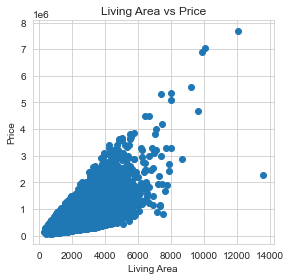

In [13]:
plt.figure(figsize=(4,4))
plt.scatter(x="sqft_living",y="price",data = house_data)
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.title("Living Area vs Price")
plt.tight_layout()
plt.show()

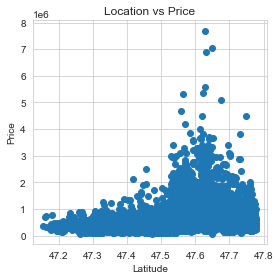

In [14]:
plt.figure(figsize=(4,4))
plt.scatter(x="lat",y="price",data = house_data)
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.title("Location vs Price")
plt.tight_layout()
plt.show()

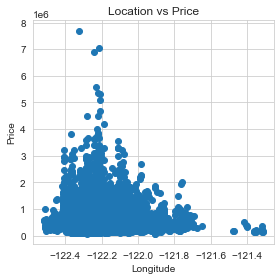

In [15]:
plt.figure(figsize=(4,4))
plt.scatter(x="long",y="price",data = house_data)
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.title("Location vs Price")
plt.tight_layout()
plt.show()

<Figure size 288x288 with 0 Axes>

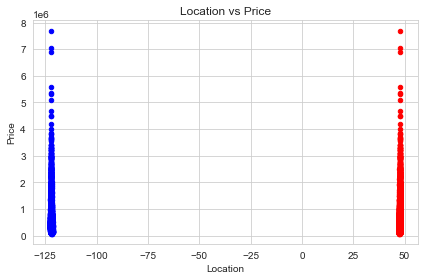

In [16]:
plt.figure(figsize=(4,4))

ax = house_data.plot(kind="scatter", x="long",y="price", color="b")
house_data.plot(kind="scatter", x="lat",y="price", color="r", ax=ax)


ax.set_xlabel("Location")
ax.set_ylabel("Price")
ax.set_title("Location vs Price")
plt.tight_layout()
plt.show()

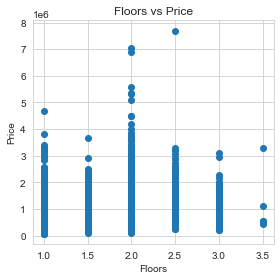

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(x="floors",y="price",data = house_data)
plt.xlabel("Floors")
plt.ylabel("Price")
plt.title("Floors vs Price")
plt.tight_layout()
plt.show()

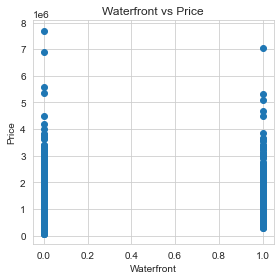

In [18]:
plt.figure(figsize=(4,4))
plt.scatter(x="waterfront",y="price",data = house_data)
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.title("Waterfront vs Price")
plt.tight_layout()
plt.show()

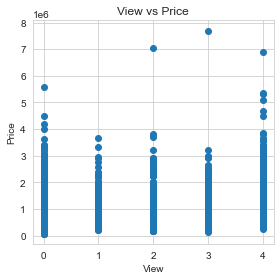

In [19]:
plt.figure(figsize=(4,4))
plt.scatter(x="view",y="price",data = house_data)
plt.xlabel("View")
plt.ylabel("Price")
plt.title("View vs Price")
plt.tight_layout()
plt.show()

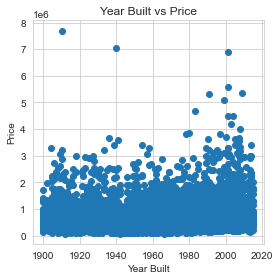

In [20]:
plt.figure(figsize=(4,4))
plt.scatter(x="yr_built",y="price",data = house_data)
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("Year Built vs Price")
plt.tight_layout()
plt.show()

Now we can filter out dates to select for 2014 and then drop the column id as id does not provide any actual information about target variable

In [21]:
conv_dates = [1 if values == 2014 else 0 for values in house_data["date"]]
house_data['date'] = conv_dates
house_data = house_data.drop(['id'],axis=1)

Now we can split the data into features and label as seen

In [22]:
#Split data into Features and Labels
X = house_data.drop("price", axis=1)
y = house_data["price"]

Now that we have this split, lets work to make the train-test split which ensures our data can be tested on unseen data which wont be used in training.

In [23]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

Lets run our Linear Regression Model to test how well it does. Feel free to experiment with this and use the sklearn documentation to see if you can tweak this.

In [24]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [25]:
linear_regression.fit(X_train,y_train)
lr = linear_regression.score(X_test,y_test)
print("Linear Regressor Accuracy Score obtained:","{:.2f}".format(lr+100))

Linear Regressor Accuracy Score obtained: 100.71


Similarly, you can try running this Ridge Regression model, which is a Linear Regression model with some levels of regulatisation to ensure features are given similar weightage. This will be explained in Lesson 5.

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [27]:
ridge.fit(X_train,y_train)
r = ridge.score(X_test,y_test)
print("Ridge Regressor Accuracy Score obtained:","{:.2f}".format(r+100))

Ridge Regressor Accuracy Score obtained: 100.71


Now let us try to run a RandomForestRegressor which is a huge collection of Decision trees which are filtered according to their results. You can try experimenting with the n_estimators and see if you can change the accuracy scores.

In [28]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100)


regr.fit(X_train,y_train)

rfr = regr.score(X_test,y_test)

print("RandomForestRegressor Accuracy Score obtained:","{:.2f}".format(rfr+100))

RandomForestRegressor Accuracy Score obtained: 100.88
